<a href="https://colab.research.google.com/github/iamviji/project/blob/master/misc/ITPP_Install.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!sudo apt-get install autoconf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  automake autotools-dev libsigsegv2 m4
Suggested packages:
  autoconf-archive gnu-standards autoconf-doc libtool gettext m4-doc
The following NEW packages will be installed:
  autoconf automake autotools-dev libsigsegv2 m4
0 upgraded, 5 newly installed, 0 to remove and 11 not upgraded.
Need to get 1,082 kB of archives.
After this operation, 3,994 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libsigsegv2 amd64 2.12-1 [14.7 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 m4 amd64 1.4.18-1 [197 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 autoconf all 2.69-11 [322 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 autotools-dev all 20180224.1 [39.6 kB]
Get:5 http://archive.ubuntu.com/ubuntu bionic/main amd64 automake all 1:1.15.1-3ubuntu2 [509 kB]
Fet

In [2]:
!sudo apt-get install libtool

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  file libmagic-mgc libmagic1
Suggested packages:
  libtool-doc gcj-jdk
The following NEW packages will be installed:
  file libmagic-mgc libmagic1 libtool
0 upgraded, 4 newly installed, 0 to remove and 11 not upgraded.
Need to get 468 kB of archives.
After this operation, 6,555 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic-mgc amd64 1:5.32-2ubuntu0.4 [184 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 libmagic1 amd64 1:5.32-2ubuntu0.4 [68.6 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic-updates/main amd64 file amd64 1:5.32-2ubuntu0.4 [22.1 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 libtool all 2.4.6-2 [194 kB]
Fetched 468 kB in 1s (510 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program 

In [3]:
!sudo apt-get install liblapack-dev libblas-dev libfftw3-dev

Reading package lists... Done
Building dependency tree       
Reading state information... Done
liblapack-dev is already the newest version (3.7.1-4ubuntu1).
The following additional packages will be installed:
  libblas3 libfftw3-bin libfftw3-long3 libfftw3-quad3 libfftw3-single3
Suggested packages:
  liblapack-doc libfftw3-doc
The following NEW packages will be installed:
  libblas-dev libblas3 libfftw3-bin libfftw3-dev libfftw3-long3 libfftw3-quad3
  libfftw3-single3
0 upgraded, 7 newly installed, 0 to remove and 11 not upgraded.
Need to get 4,049 kB of archives.
After this operation, 22.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/main amd64 libblas3 amd64 3.7.1-4ubuntu1 [140 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/main amd64 libblas-dev amd64 3.7.1-4ubuntu1 [143 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/main amd64 libfftw3-long3 amd64 3.3.7-1 [308 kB]
Get:4 http://archive.ubuntu.com/ubuntu bionic/main amd64 libfftw3-qu

In [4]:
!rm -rf itpp
!git clone https://github.com/iamviji/itpp.git # original one had compilation issue, did minor signle line change after forking

Cloning into 'itpp'...
remote: Enumerating objects: 14431, done.
remote: Total 14431 (delta 0), reused 0 (delta 0), pack-reused 14431
Receiving objects: 100% (14431/14431), 4.88 MiB | 15.78 MiB/s, done.
Resolving deltas: 100% (12154/12154), done.


In [5]:
!ls;cd itpp;ls;mkdir -p build1 build2; cd build1 ; cmake cmake ..;make ;make install

itpp  sample_data
AUTHORS		cmake			itpp-config.cmake.in  NEWS-3.10
autogen.sh	CMakeLists.txt		itpp-config.in	      NEWS-3.9
ChangeLog	configure.ac.in		itpp_debug.pc.in      NEWS-3.99
ChangeLog-2005	COPYING			itpp.pc.cmake.in      NEWS-4.0
ChangeLog-2006	doc			itpp.pc.in	      NEWS-4.2
ChangeLog-2007	extras			itpp.spec.in	      README
ChangeLog-2008	gtests			m4		      README.md
ChangeLog-2009	INSTALL			Makefile.am	      tests
ChangeLog-2010	itpp			Makefile.common       VERSION
ChangeLog-2011	itpp-config.1.cmake.in	Makefile.in	      win32
ChangeLog-2012	itpp-config.1.in	NEWS
-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compiler: /usr/bin/cc -- works
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Detecting C compile features
-- Detecting C compile features - done
-- Check for working CXX compiler: /usr/bin/c++
-- Check for working CXX compiler: 

In [6]:
!rm -rf py-itpp
!git clone https://github.com/vidits-kth/py-itpp.git


Cloning into 'py-itpp'...
remote: Enumerating objects: 60, done.
remote: Counting objects: 100% (60/60), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 1155 (delta 27), reused 35 (delta 13), pack-reused 1095
Receiving objects: 100% (1155/1155), 1.92 MiB | 12.50 MiB/s, done.
Resolving deltas: 100% (646/646), done.


In [7]:
!pip3 install pybind11


     |████████████████████████████████| 194kB 3.3MB/s 


In [8]:
!cd py-itpp;./install_prerequisites_python3.sh;make install;pip3 install -e .  

Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:3 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:4 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Hit:8 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:9 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:10 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Get:12 http://security.ubuntu.com/ubuntu bionic-security

In [9]:
!cd py-itpp; ls ; pip3 install -e .  
!cat py-itpp/setup.py

examples			  lib	   makefile   README.md  src
install_prerequisites_python3.sh  LICENSE  makerules  setup.py
Obtaining file:///content/py-itpp
  Found existing installation: itpp 0.0.3
    Can't uninstall 'itpp'. No files were found to uninstall.
  Running setup.py develop for itpp
from setuptools import setup

setup(name='itpp',
      version='0.0.3',
      package_dir = {'': 'lib'})


In [13]:
import sys
sys.path.append('./py-itpp/lib')

In [11]:
!cp -rf py-itpp/lib/itpp py-itpp/lib/pyitpp # import itpp is not working, after this hack i started to work


Real valued Hamming codes over AWGN channel¶


In [17]:
import pyitpp as itpp
from matplotlib import pyplot as plt

BER for uncoded over AWGN


In [18]:
def bit_error_ratio_uncoded_awgn(snr_db):
    '''Generate random bits'''
    nrof_bits = 3 * 100000
    source_bits = itpp.base.randb(nrof_bits)
    
    '''Modulate the bits'''
    modulator = itpp.comm.BPSK()
    tx_signal = modulator.modulate_bits(source_bits)
    
    '''Add the effect of channel to the signal'''
    #noise_variance = itpp.math.inv_dB(-snr_db)
    noise_variance = 10 ** (-snr_db * 0.1)
    channel = itpp.comm.AWGN_Channel(noisevar=noise_variance)

    rx_signal = channel(tx_signal)
    
    '''Demodulate the signal'''
    demodulated_bits = modulator.demodulate_bits(rx_signal)
    
    '''Calculate the bit error ratio'''
    return itpp.comm.BERC.count_errors(source_bits, demodulated_bits, 0, 0, 0) / nrof_bits

BER for Hamming (7, 4) coded over AWGN


In [19]:
def bit_error_ratio_hamming_awgn(snr_db):
    '''Hamming encoder and decoder instance'''
    k = 3 # (7,4) Hamming code
    hamm = itpp.comm.Hamming_Code(k)
    
    '''Generate random bits'''
    nrof_bits = k * 100000
    source_bits = itpp.randb(nrof_bits)
    
    '''Encode the bits'''
    encoded_bits = hamm.encode(source_bits)
    
    '''Modulate the bits'''
    modulator = itpp.comm.BPSK()
    tx_signal = modulator.modulate_bits(encoded_bits)
    
    '''Add the effect of channel to the signal'''
    #noise_variance = itpp.math.inv_dB(-snr_db)
    noise_variance = 10 ** (-snr_db * 0.1)
    channel = itpp.comm.AWGN_Channel(noisevar=noise_variance)

    rx_signal = channel(tx_signal)
    
    '''Demodulate the signal'''
    demodulated_bits = modulator.demodulate_bits(rx_signal)
    
    '''Decode the received bits'''
    decoded_bits = hamm.decode(demodulated_bits) 
    
    '''Calculate the bit error ratio'''
    return itpp.comm.BERC.count_errors(source_bits, decoded_bits, 0, 0, 0) / nrof_bits

Run simulation


In [20]:
'''SNR range'''
snrs_db = range(-10, 10) 

print('BER for uncoded bits over AWGN channel')
ber_unc = [bit_error_ratio_uncoded_awgn(snr) for snr in snrs_db]

print('BER for Hamming (7, 4) coded  bits over AWGN channel')
ber = [bit_error_ratio_hamming_awgn(snr) for snr in snrs_db]

BER for uncoded bits over AWGN channel
BER for Hamming (7, 4) coded  bits over AWGN channel


Plot results


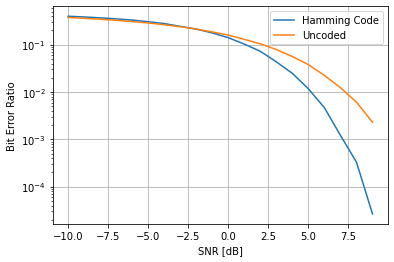

In [21]:
plt.figure()
plt.grid(True)
plt.semilogy(snrs_db, ber)
plt.semilogy(snrs_db, ber_unc)
plt.xlabel('SNR [dB]')
plt.ylabel('Bit Error Ratio')
plt.legend(['Hamming Code', 'Uncoded'])
plt.show()